In [1]:
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load the Old Sun Exposed Data
exp_data_path = 'C:/Users/black/OneDrive/Documents/Mitra/Mitra_Bio_Methlyation/data/GSM1255799-4943.txt'
oldExp = np.loadtxt(exp_data_path, delimiter='	', skiprows=3, dtype=str)

# Load the Old Sun Protected Data
pro_data_path = 'C:/Users/black/OneDrive/Documents/Mitra/Mitra_Bio_Methlyation/data/GSM1255789-4933.txt'
oldPro = np.loadtxt(pro_data_path, delimiter='	', skiprows=3, dtype=str)

In [3]:
# Extract the beta values
betaExp = [np.nan] * len(oldExp)
betaPro = [np.nan] * len(oldExp)
for i in range(len(oldExp)):
    if oldExp[i][1] == "":
        continue
    else:
        betaExp[i]= float(oldExp[i][1])
        
    if oldPro[i][1]== "":
        continue
    else:
        betaPro[i] = float(oldPro[i][1])

# Extract list of genes
gene_list = [None] * len(oldExp)
for i in range(len(oldExp)):
    gene_list[i]= oldExp[i][0]

In [4]:
# calculate the mean of the data
meanExp = np.nanmean(betaExp)
meanPro = np.nanmean(betaPro)

print("Exposed beta mean: ", meanExp)
print("Protected beta mean: ", meanPro)

Exposed beta mean:  0.4892778657337746
Protected beta mean:  0.4818631952114089


In [5]:
# Calculate the variance and std. dev

var_Exp = np.nanvar(betaExp)
var_Pro = np.nanvar(betaPro)

std_Exp = np.nanstd(betaExp)
std_Pro = np.nanstd(betaPro)

print("Exposed beta variance: ", meanExp, " Std Dev: ", std_Exp)
print("Protected beta variance: ", meanPro, " Std Dev: ", std_Pro)

Exposed beta variance:  0.4892778657337746  Std Dev:  0.34111272704617684
Protected beta variance:  0.4818631952114089  Std Dev:  0.34733154716864306


In [6]:
# Finding the max and min values

max_Exp = np.nanmax(betaExp)
max_Pro = np.nanmax(betaPro)
min_Exp = np.nanmin(betaExp)
min_Pro = np.nanmin(betaPro)

print("Exposed Min/Max: ", str.format('{0:.10f}', min_Exp), " / ", str.format('{0:.10f}', max_Exp))
print("Protected Min/Max: ", str.format('{0:.10f}', min_Pro), " / ", str.format('{0:.10f}', max_Pro))


Exposed Min/Max:  0.0000000000  /  1.0000000000
Protected Min/Max:  0.0000000000  /  1.0000000000


In [13]:
# Save data in dataframe for easier analysis
list_tuples=list(zip(betaExp,betaPro))

df = pd.DataFrame(list_tuples, index=gene_list)

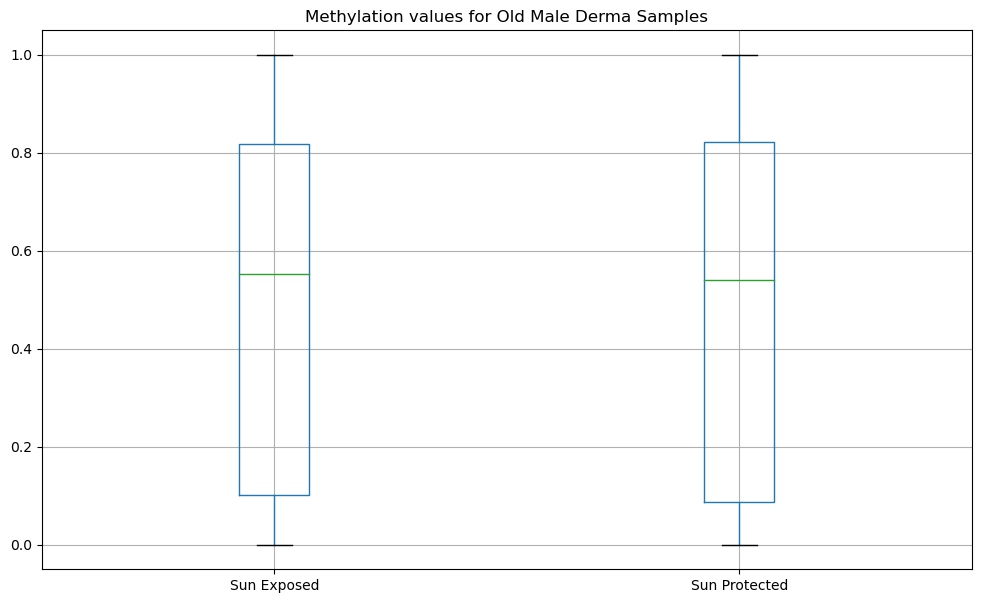

In [21]:
df_box = pd.DataFrame(list_tuples, index=gene_list, columns=['Sun Exposed','Sun Protected'])
fig1, ax = plt.subplots(figsize=(12,7))
ax.set_title("Methylation values for Old Male Derma Samples")
boxplot = df_box.boxplot(column = ['Sun Exposed','Sun Protected'])

plt.show()

In [22]:
# PCA Analysis

# create dataframe for PCA
df_PCA=df.T
targets = pd.DataFrame(["Sun Exposed","Sun Protected"], columns=["target"])
#df.head()
#targets.head()

#remove NAN and transpose
df2 = df_PCA.dropna(axis=1, how='any')
print("%d rows with missing values were removed." % (len(df_PCA.columns) - len(df2.columns)))
#print (df2.head())

# Standardising values
x = df2.values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components = 2, random_state = 0)
principalComponents = pca.fit_transform(x)
pca_names = [str(i)+str(j) for i,j in zip(['PC']*2,range(1,2+1))]
principalDf = pd.DataFrame(data = principalComponents, columns = pca_names, index = df2.index)

finalDf = pd.concat([principalDf, targets], axis = 1)
finalDf.head()

32 rows with missing values were removed.


,PC1,PC2,target
0,696.437363,5.856081e-10,Sun Exposed
1,-696.437363,5.856081e-10,Sun Protected


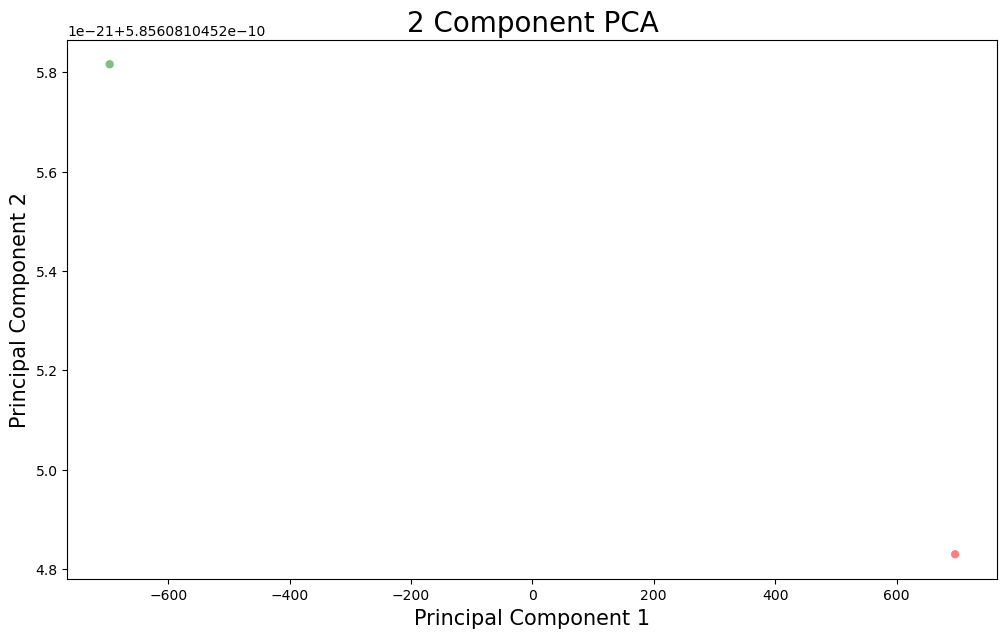

In [17]:
fig2, ax2 = plt.subplots(figsize=(12,7))
ax2.set_xlabel('Principal Component 1', fontsize = 15)
ax2.set_ylabel('Principal Component 2', fontsize = 15)
ax2.set_title('2 Component PCA', fontsize = 20)

#colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])
colors = np.array(["red","green"])
plt.scatter(principalComponents[:, 0], principalComponents[:, 1],
            edgecolor='none', alpha=0.5, c=colors,
            cmap=plt.cm.get_cmap('rainbow', 4))
plt.show()

In [18]:
pca_vars = pca.explained_variance_ratio_
for n,v in zip(pca_names, pca_vars):
    print ("Variance explained by %s : %.4f%%" % (n, v*100))

Variance explained by PC1 : 100.0000%
Variance explained by PC2 : 0.0000%
